In [2]:
# Import packages
import pandas as pd
import os

# Set the current working directory to be the project main folder
os.chdir('/Users/tanijarv/Documents/GitHub/HLR-dev')

# Import the HLR module
import HLR

---
Diagnostic tests - step1

Independence of Residuals = PASSED (Durbin-Watson Test)
Linearity = PASSED (Non-sig. linear relationship between DV and each IV)
Linearity = PASSED (Rainbow Test)
Homoscedasticity = FAILED (Bruesch Pagan Test)
Homoscedasticity = FAILED (F-test for residual variance)
Homoscedasticity = PASSED (Goldfeld Quandt Test)
Multicollinearity = PASSED (High Pairwise correlations)
Multicollinearity = PASSED (High Variance Inflation Factor)
Outliers/Leverage/Influence = PASSED (Extreme Standardised Residuals)
Outliers/Leverage/Influence = PASSED (Large Cook's Distance)
Normality = PASSED (Mean of residuals not approx = 0)
Normality = FAILED (Shapiro-Wilk Test)
 
FURTHER INSPECTION REQUIRED -> 1/3 tests passed for assumption - Homoscedasticity
FURTHER INSPECTION REQUIRED -> 1/2 tests passed for assumption - Normality


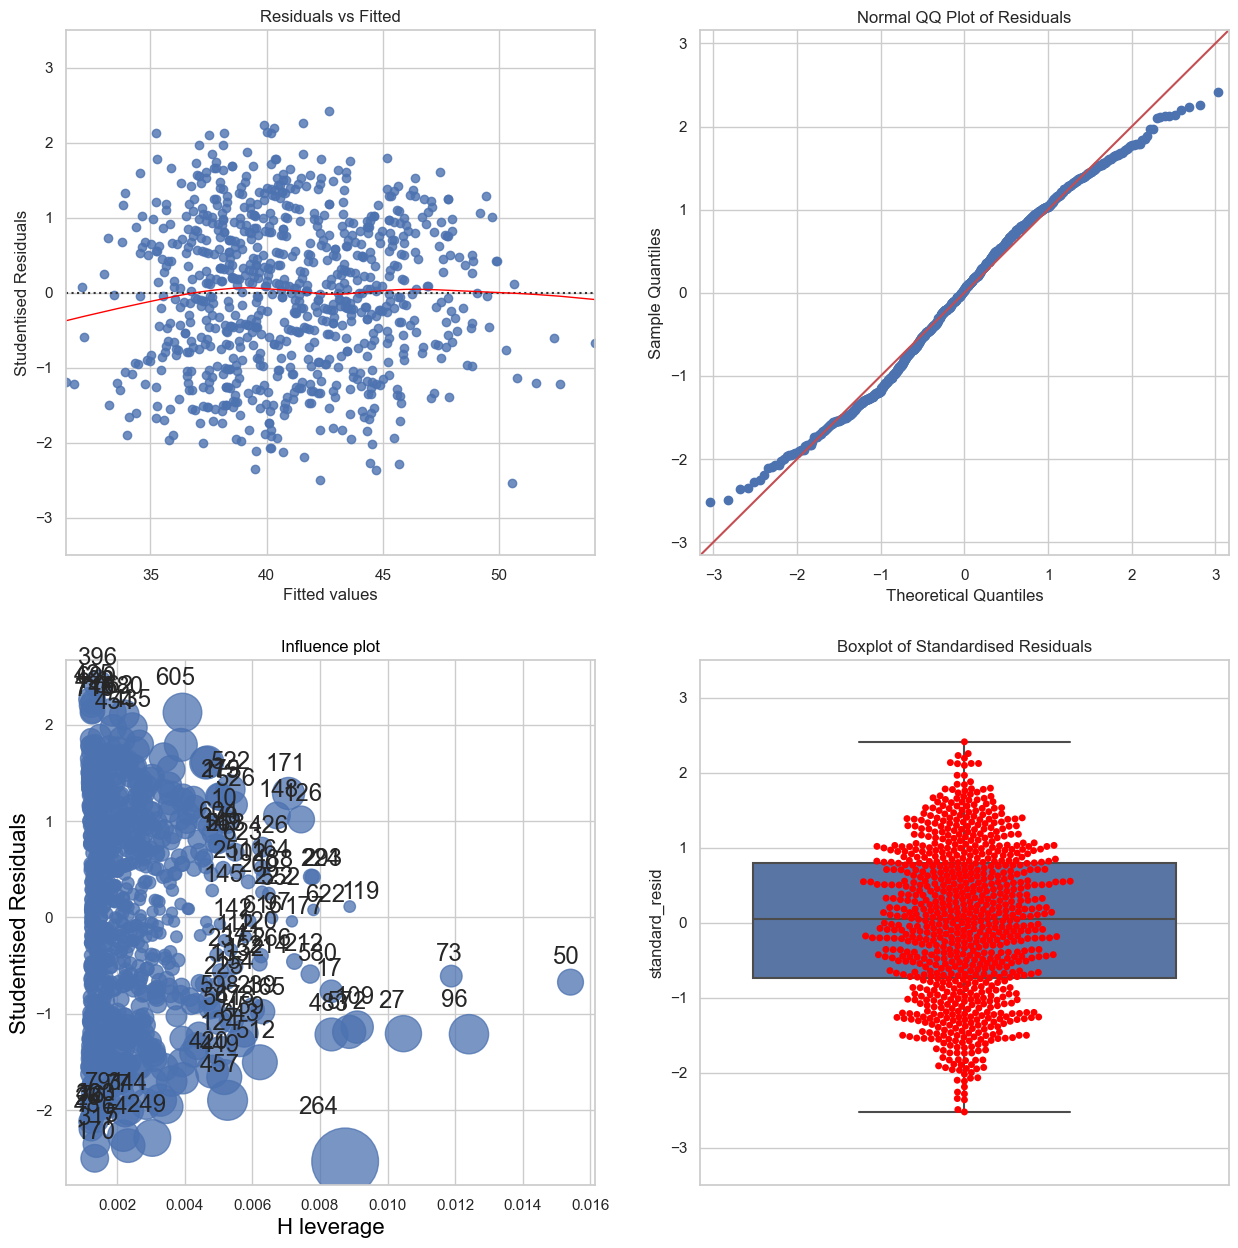

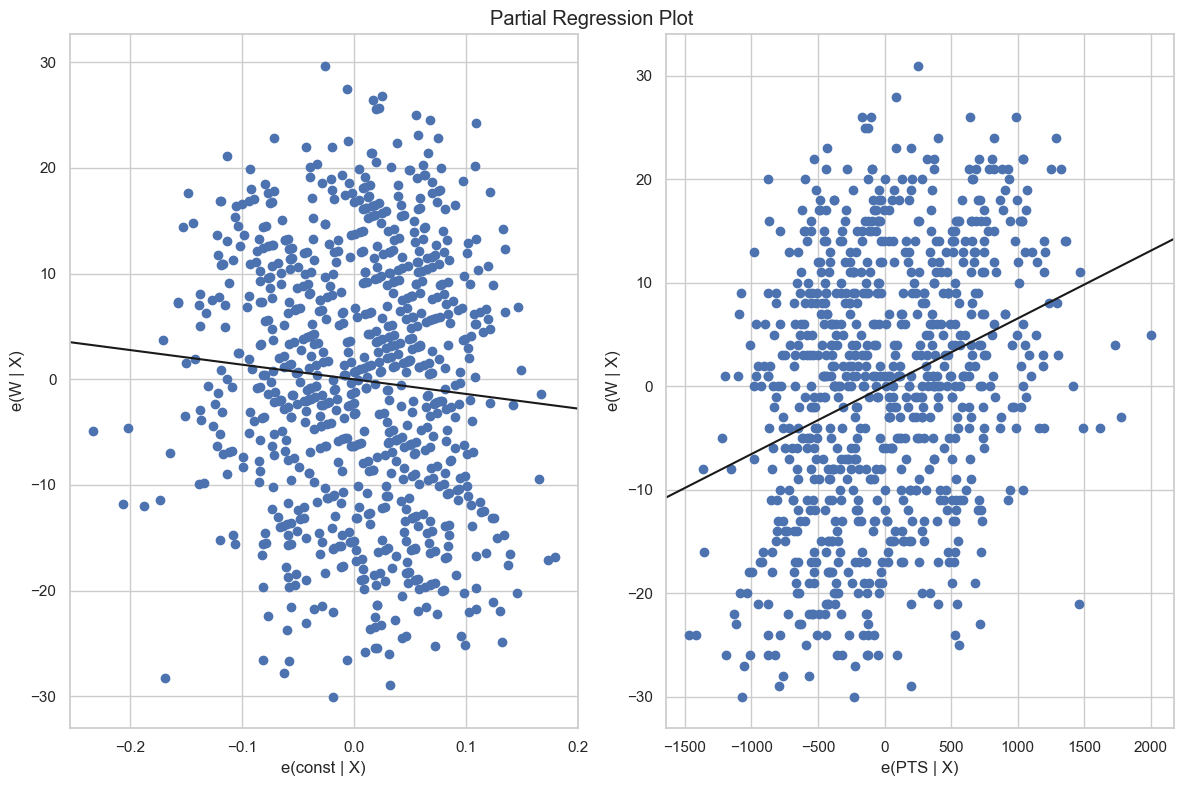

---
Diagnostic tests - step2

Independence of Residuals = PASSED (Durbin-Watson Test)
Linearity = PASSED (Non-sig. linear relationship between DV and each IV)
Linearity = PASSED (Rainbow Test)
Homoscedasticity = PASSED (Bruesch Pagan Test)
Homoscedasticity = PASSED (F-test for residual variance)
Homoscedasticity = PASSED (Goldfeld Quandt Test)
Multicollinearity = FAILED (High Pairwise correlations)
Multicollinearity = FAILED (High Variance Inflation Factor)
Outliers/Leverage/Influence = PASSED (Extreme Standardised Residuals)
Outliers/Leverage/Influence = PASSED (Large Cook's Distance)
Normality = PASSED (Mean of residuals not approx = 0)
Normality = FAILED (Shapiro-Wilk Test)
 
FURTHER INSPECTION REQUIRED -> 0/2 tests passed for assumption - Multicollinearity
FURTHER INSPECTION REQUIRED -> 1/2 tests passed for assumption - Normality


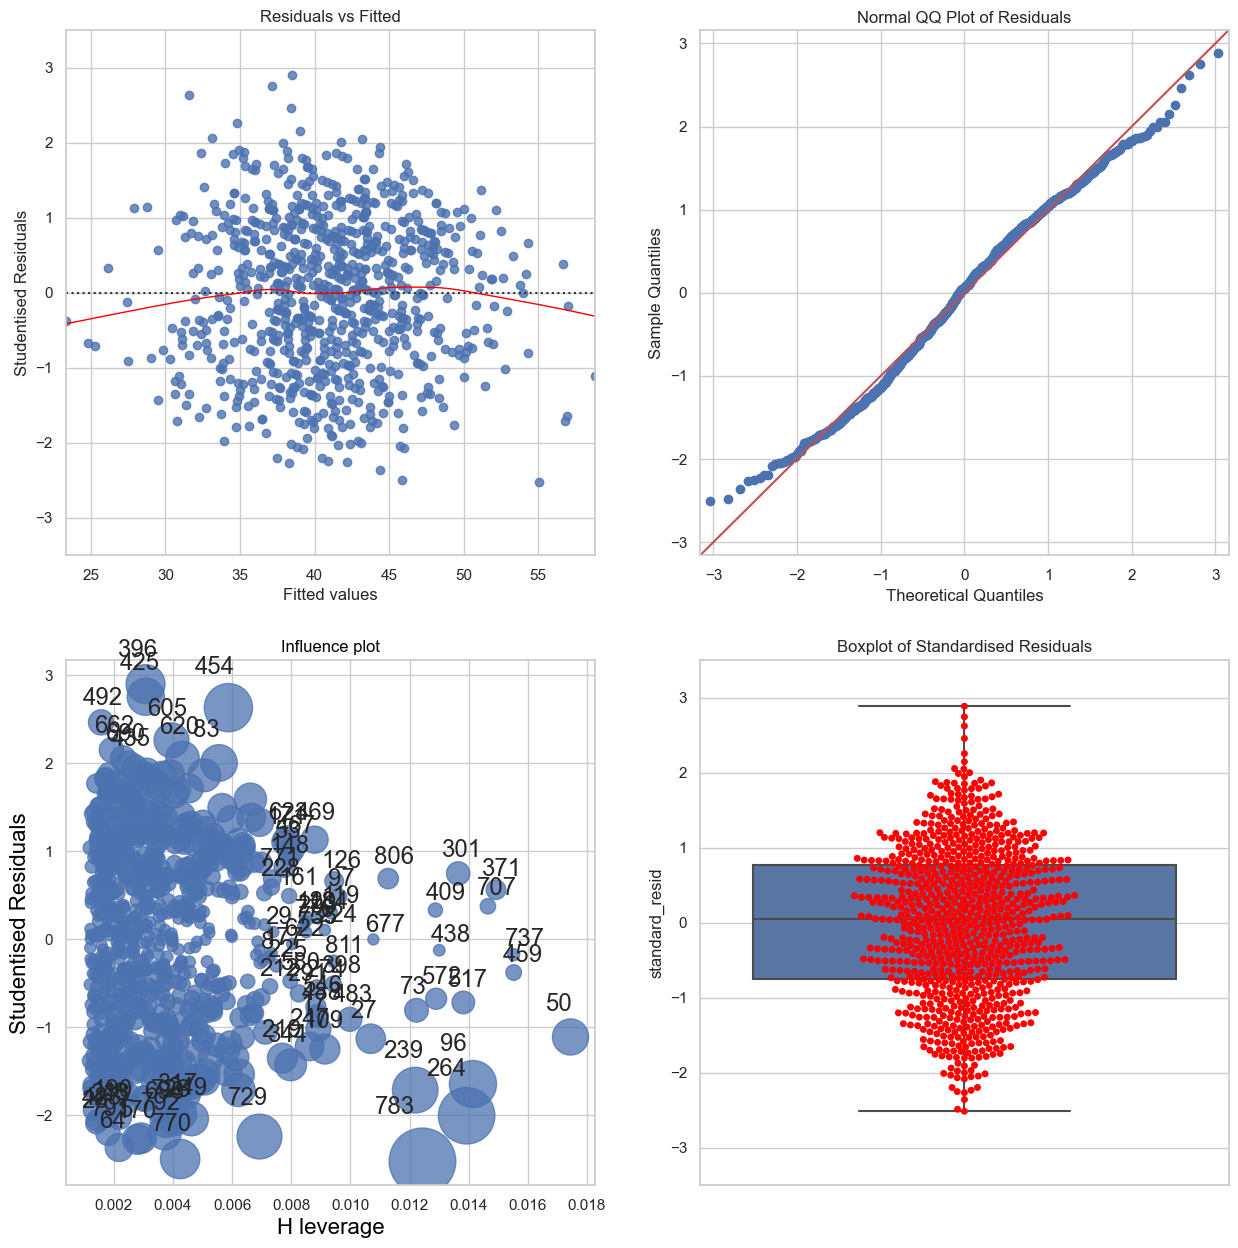

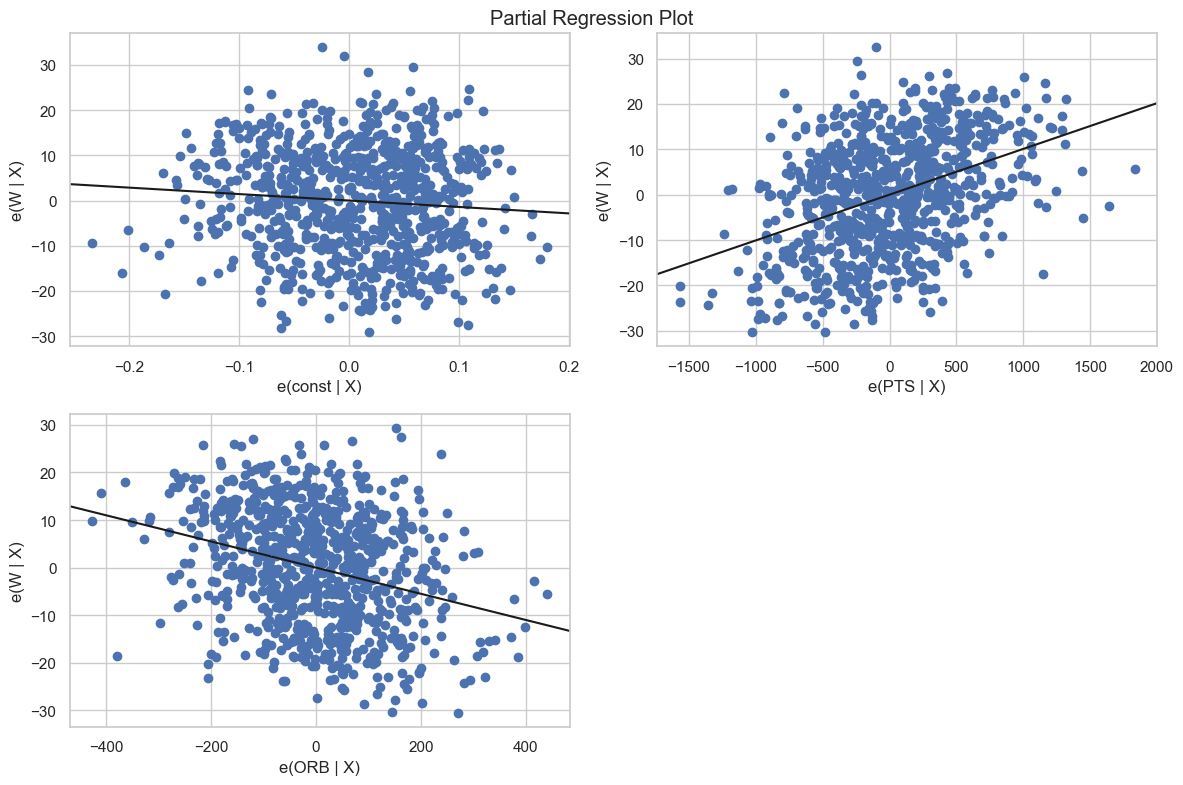

---
Diagnostic tests - step3

Independence of Residuals = PASSED (Durbin-Watson Test)
Linearity = PASSED (Non-sig. linear relationship between DV and each IV)
Linearity = PASSED (Rainbow Test)
Homoscedasticity = PASSED (Bruesch Pagan Test)
Homoscedasticity = PASSED (F-test for residual variance)
Homoscedasticity = PASSED (Goldfeld Quandt Test)
Multicollinearity = FAILED (High Pairwise correlations)
Multicollinearity = FAILED (High Variance Inflation Factor)
Outliers/Leverage/Influence = FAILED (Extreme Standardised Residuals)
Outliers/Leverage/Influence = PASSED (Large Cook's Distance)
Normality = PASSED (Mean of residuals not approx = 0)
Normality = FAILED (Shapiro-Wilk Test)
 
FURTHER INSPECTION REQUIRED -> 0/2 tests passed for assumption - Multicollinearity
FURTHER INSPECTION REQUIRED -> 1/2 tests passed for assumption - Outliers/Leverage/Influence
FURTHER INSPECTION REQUIRED -> 1/2 tests passed for assumption - Normality


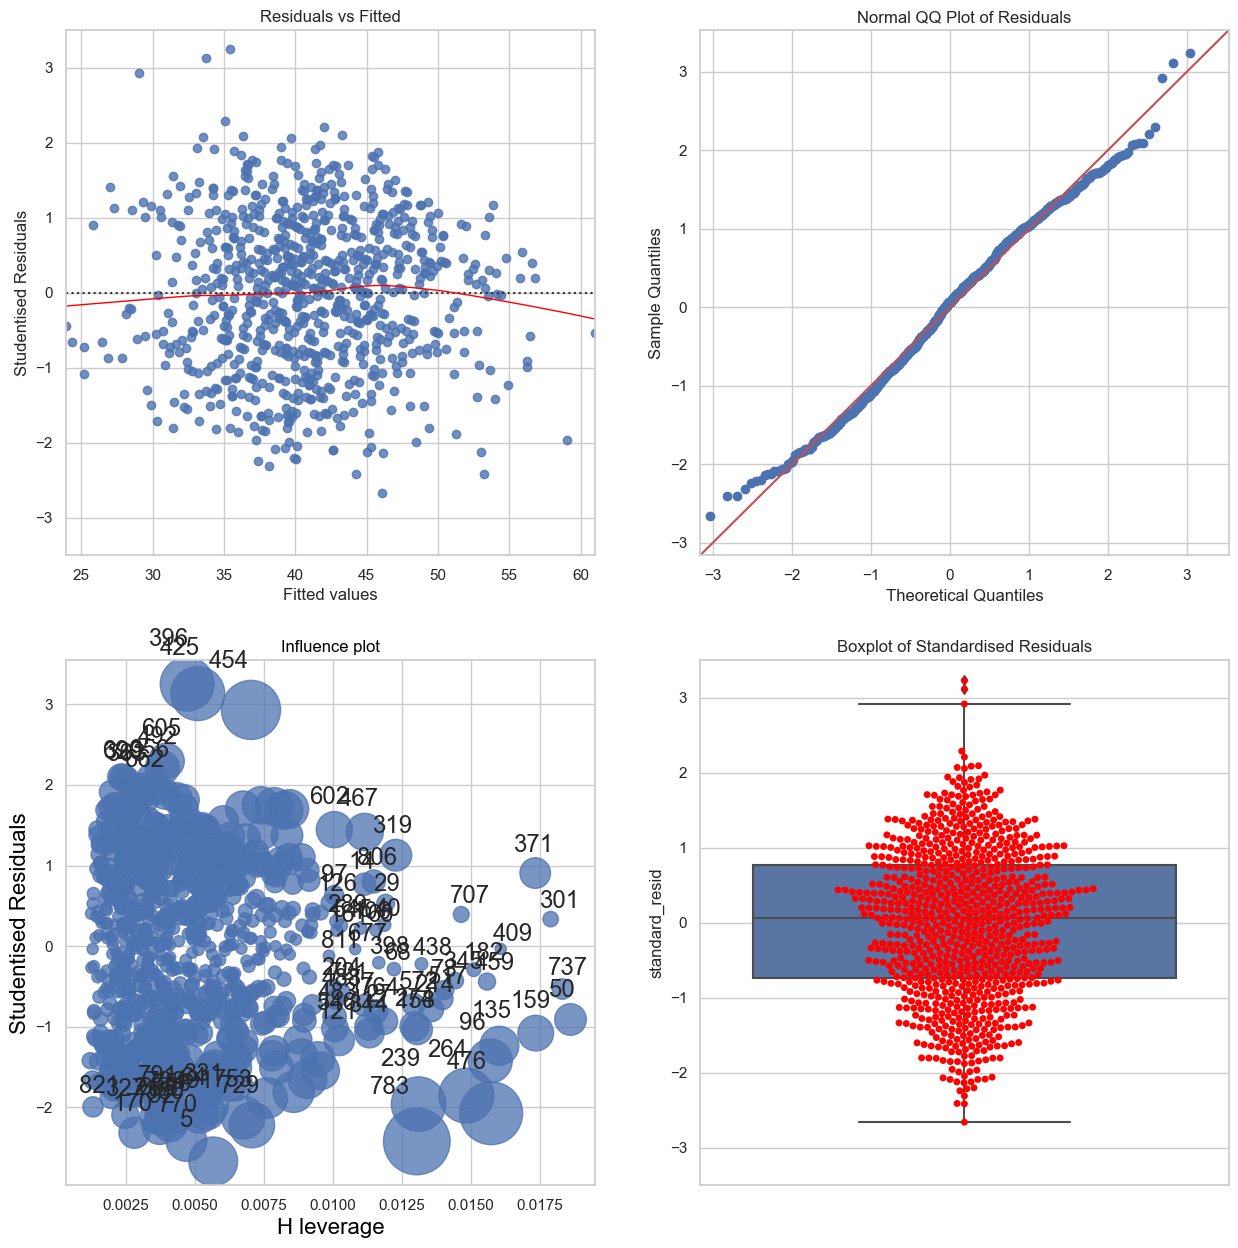

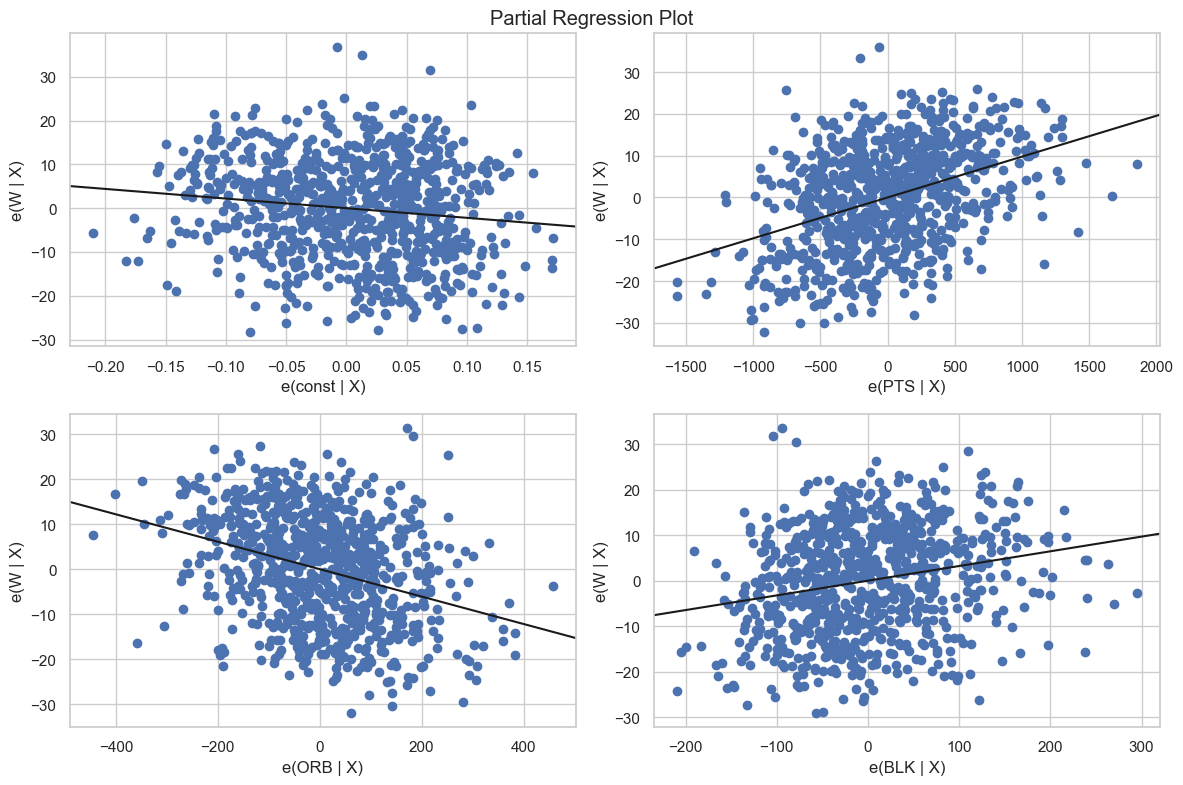

,Step,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSE,SSTO,MSE (model),MSE (residuals),MSE (total),Beta coefs,P-values (beta coefs),Failed assumptions (check!),R-squared change,F-value change,P-value (F change)
0,1,[points],835.0,833.0,1.0,0.089297,81.677748,1.099996e-18,123292.827686,135382.0,12089.172314,148.010597,162.328537,"{'Constant': -13.846261266053896, 'points': 0....","{'Constant': 0.023091997486255577, 'points': 1...","[Homoscedasticity, Normality]",NaN,NaN,NaN
1,2,"[points, offensive_rebounds]",835.0,832.0,2.0,0.168503,84.302598,4.591961e-34,112569.697267,135382.0,11406.151367,135.300117,162.328537,"{'Constant': -14.225561767669713, 'points': 0....","{'Constant': 0.014660145903221372, 'points': 1...","[Multicollinearity, Normality]",0.079206,79.254406,3.372595e-18
2,3,"[points, offensive_rebounds, blocks]",835.0,831.0,3.0,0.210012,73.638176,3.065838e-42,106950.174175,135382.0,9477.275275,128.700571,162.328537,"{'Constant': -21.997353037483723, 'points': 0....","{'Constant': 0.00015712851466562279, 'points':...","[Multicollinearity, Outliers/Leverage/Influenc...",0.041509,43.663545,6.962046e-11


In [3]:
nba = pd.read_csv('example/NBA_train.csv')

# List of dataframes of predictor variables for each step
X = [nba[['PTS']],
     nba[['PTS', 'ORB']],
     nba[['PTS', 'ORB', 'BLK']]]

# List of predictor variable names for each step
X_names = [['points'],
           ['points', 'offensive_rebounds'], 
           ['points', 'offensive_rebounds', 'blocks']]

# Outcome variable as dataframe
y = nba[['W']]

hlr_model = HLR.HLR_model(diagnostics=True, showfig=True, save_folder='results', verbose=True)
model_results, reg_models = hlr_model.run(X=X, X_names=X_names, y=y)
hlr_model.save_results(filename='test', show_results=True)